In [1]:
import nltk
from os import listdir
from os.path import isfile, join
from nltk.corpus import stopwords
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [99]:
with open('../ClusteringAnalysis/id_candidates_speech.txt', 'r') as f:
    list_id_candidates = f.read()
    list_id_candidates = list_id_candidates.split('\n')[0:-1]
    list_id_candidates = np.asarray([int(e) for e in list_id_candidates])

with open('../ClusteringAnalysis/speeches_10_topics.dat','r') as f:
    list_documents_topics = f.read()
    list_documents_topics = list_documents_topics.split('\n')
    del list_documents_topics[-1]
    for k in range(len(list_documents_topics)):
        list_documents_topics[k] = list_documents_topics[k].split(' ')
        kk = 0
        while (kk<len(list_documents_topics[k])):
            if (list_documents_topics[k][kk]==''):
                del list_documents_topics[k][kk]
            else:
                kk += 1
        del list_documents_topics[k][0]
    list_documents_topics = np.asarray(list_documents_topics)

In [101]:
for k in range(len(np.unique(list_id_candidates))):
    mask_current_candidate_documents = list_id_candidates==k
    current_candidate_documents = list_documents_topics[mask_current_candidate_documents, :]
    print current_candidate_documents.shape

(20, 10)
(114, 10)
(14, 10)
(18, 10)
(12, 10)
(89, 10)
(11, 10)
(16, 10)
(12, 10)
(8, 10)
(14, 10)
(23, 10)
(23, 10)
(24, 10)
(35, 10)


In [ ]:
list_correlations = list()

In [170]:
#iterate the next two cells with different candidates (plus changing the number of clusters wrt the elbow of each
#candidate) for obtaining the correlation among OBAMA and ISIS for the various politics.

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S21 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S21 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S21 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S21 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype |S21 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
//anaconda/lib/python2.7/site-packages/s

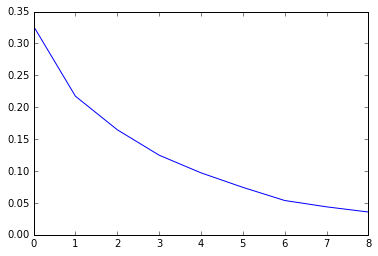

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

range_num_clusters = range(1, 10)

candidate_num = 0
mask_current_candidate_documents = list_id_candidates==candidate_num
current_candidate_documents = list_documents_topics[mask_current_candidate_documents, :]
list_variances = list()
list_centers_coordinates = list()
first_bin = 7 #OBAMA topic ID
second_bin = 9 #ISIS topic ID
for current_num_cluster in range_num_clusters:
    if (current_num_cluster>current_candidate_documents.shape[0]):
        break
    km = KMeans(n_clusters=current_num_cluster, n_init=100) #a lot of initialization to ensure good accuracy
    distance_all_centroids_matrix = km.fit_transform(current_candidate_documents)
    cluster_indexes = km.predict(current_candidate_documents)
    distances_associated_centroids = list()
    for kk in range(distance_all_centroids_matrix.shape[0]):
        distances_associated_centroids.append(distance_all_centroids_matrix[kk][cluster_indexes[kk]])
    distances_associated_centroids = np.asarray(distances_associated_centroids)
    variance_current_clustering = np.mean(distances_associated_centroids**2)
    list_variances.append(variance_current_clustering)
        
    centers_coordinates = list()
    for kk in range(current_num_cluster):
        mask_samples_current_center = cluster_indexes==kk
        samples_current_center = current_candidate_documents[mask_samples_current_center,:]
        samples_current_center = samples_current_center.astype('float32')
        centers_coordinates.append(samples_current_center.mean(axis=0))
            
    list_centers_coordinates.append(centers_coordinates)
plt.plot(list_variances)

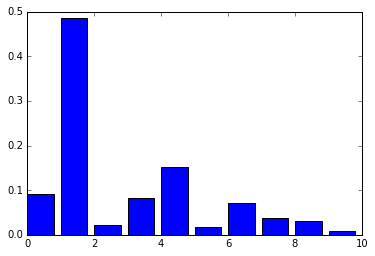

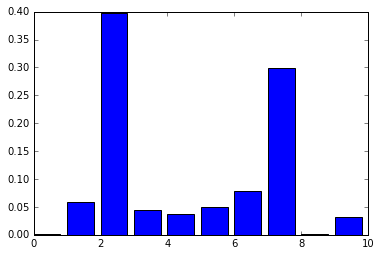

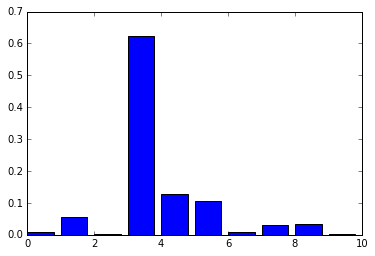

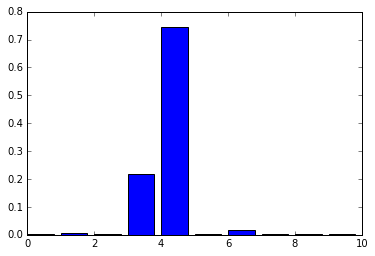

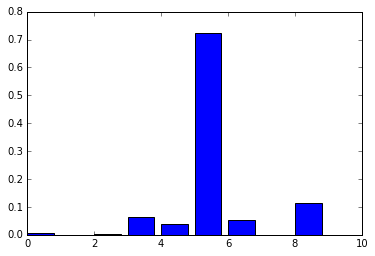

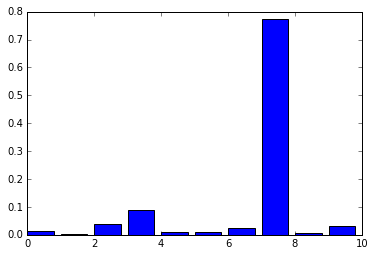

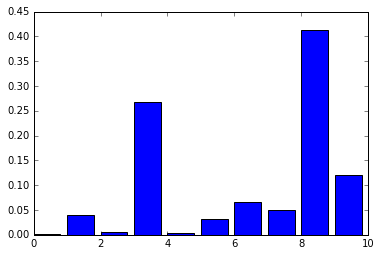

In [200]:
num_desired_clusters = 4
centers = np.asarray(list_centers_coordinates[num_desired_clusters])

list_idx_highest_feature = list()
for k in range(centers.shape[0]):
    idx_highest_feature = np.argmax(centers[k])
    list_idx_highest_feature.append(idx_highest_feature)
    
idx_sorting = [i[0] for i in sorted(enumerate(list_idx_highest_feature), key=lambda x:x[1])]
centers =  centers[idx_sorting]
max_correlation_selected_bin = 0
for k in range(centers.shape[0]):
    plt.figure()
    plt.bar(range(list_documents_topics.shape[1]), centers[k])
    plt.savefig('../ClusteringAnalysis/figures/%d/fig_%d.png' % (candidate_num, k))
    if (min(centers[k][first_bin], centers[k][second_bin])>max_correlation_selected_bin):
        max_correlation_selected_bin = min(centers[k][first_bin], centers[k][second_bin])
list_correlations.append(max_correlation_selected_bin)

([<matplotlib.axis.XTick at 0x1219c62d0>,
 <a list of 15 Text xticklabel objects>)

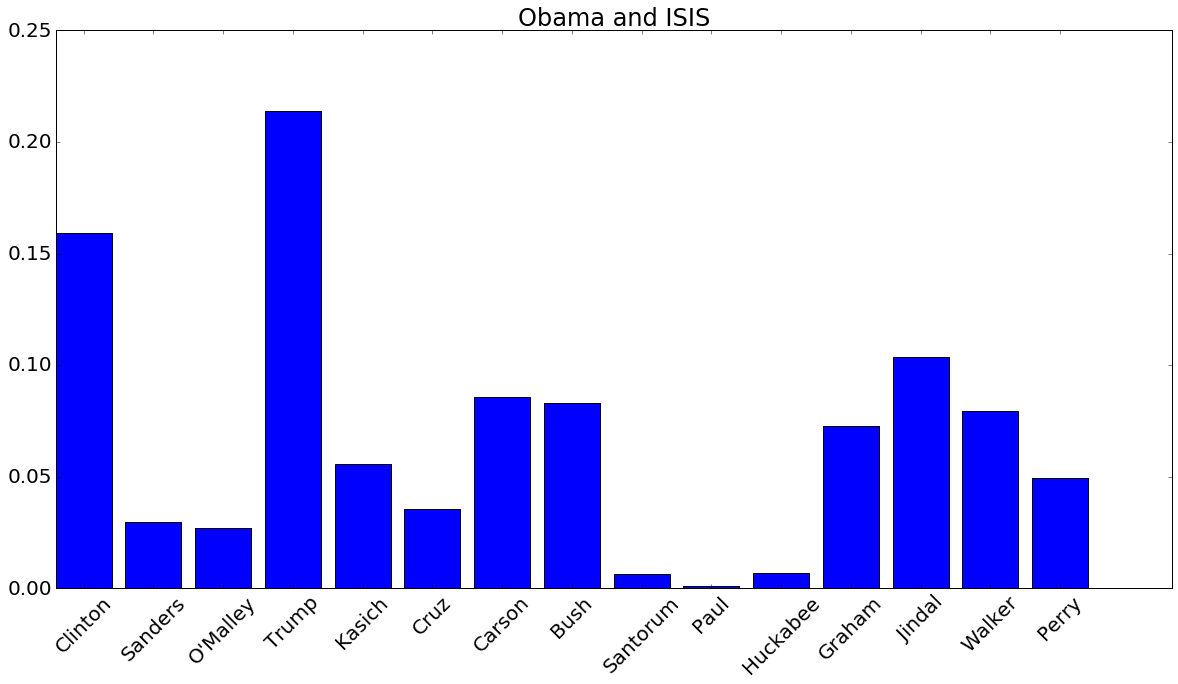

In [224]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 20
plt.bar(range(len(list_correlations)), list_correlations)
plt.title('Obama and ISIS')
my_xticks = ['Clinton','Sanders','O\'Malley','Trump', 'Kasich', 'Cruz', 'Carson', 'Bush', 'Santorum', 'Paul', \
            'Huckabee', 'Graham', 'Jindal', 'Walker', 'Perry']

plt.xticks(np.arange(len(list_correlations))+0.4, my_xticks, rotation=45)